   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

<ipython-input-43-fbe986eb9d2a>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
<ipython-input-43-fbe986eb9d2a>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

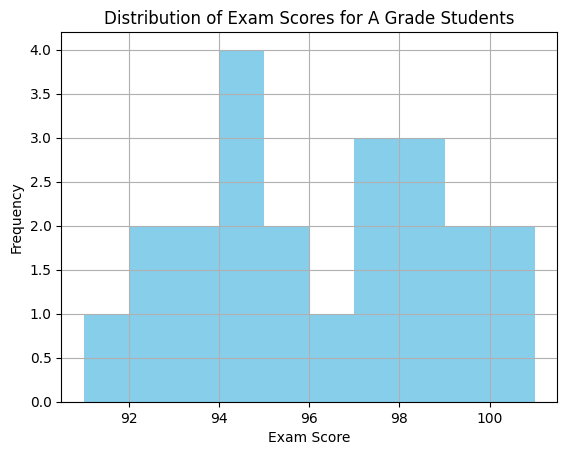

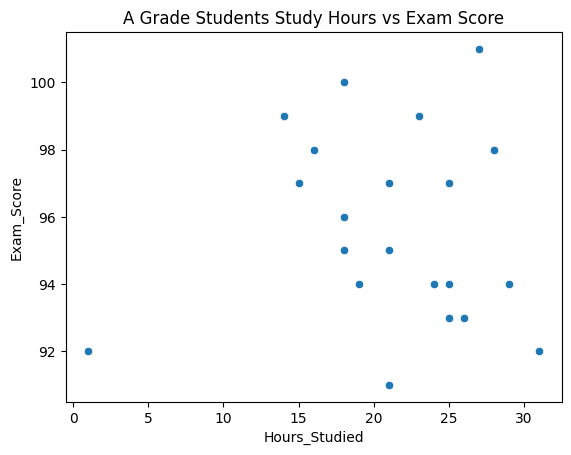

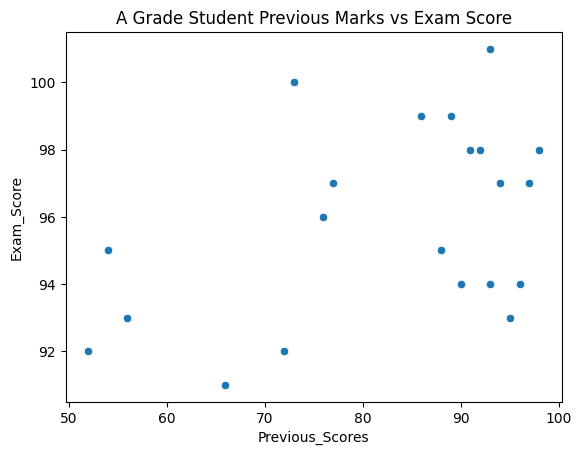

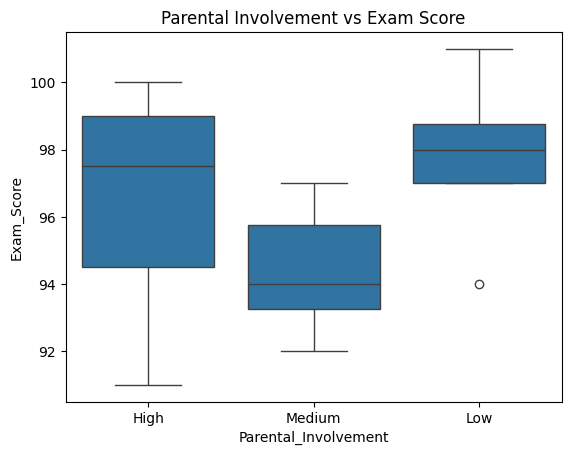

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/sample_data/StudentPerformanceFactors.csv")

# Display first 5 rows
print(df.head(5))

# Dataset info
print(df.info())

# Fill missing values with mode
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

# Remove duplicate rows
df = df.drop_duplicates()

# Select relevant columns
A_Plus = df[["Hours_Studied", "Exam_Score", "Previous_Scores", "Parental_Involvement", "Internet_Access"]]

# Correct grade filtering
A_Grade = A_Plus[A_Plus["Exam_Score"] >= 90]
B_Grade = A_Plus[(A_Plus["Exam_Score"] >= 80) & (A_Plus["Exam_Score"] < 90)]
C_Grade = A_Plus[(A_Plus["Exam_Score"] >= 70) & (A_Plus["Exam_Score"] < 80)]

# Histogram for A Grade students' exam scores
A_Grade["Exam_Score"].hist(bins=10, color="skyblue")
plt.title("Distribution of Exam Scores for A Grade Students")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: Hours Studied vs Exam Score (A Grade)
sns.scatterplot(x=A_Grade["Hours_Studied"], y=A_Grade["Exam_Score"])
plt.title("A Grade Students Study Hours vs Exam Score")
plt.show()

# Scatter plot: Previous Scores vs Exam Score (A Grade)
sns.scatterplot(x=A_Grade["Previous_Scores"], y=A_Grade["Exam_Score"])
plt.title("A Grade Student Previous Marks vs Exam Score")
plt.show()

# Box plot: Parental Involvement vs Exam Score (A Grade)
sns.boxplot(x=A_Grade["Parental_Involvement"].astype(str), y=A_Grade["Exam_Score"])
plt.title("Parental Involvement vs Exam Score")
plt.show()
